## BUSINESS CASE

My goal is to build  a machine learning model that can predict the wages of football players that will be beneficial to premier league teams when they are signing new players based on their performance in the previous season (2018/2019) anD get some insights and analysis into what type if players clubs would be interested in, thereby making a decision on whether to buy them based on certain criteria
I aim to build a machine learning model using numerous regression techniques and getting the best predictor model  that is ideal for your club as a premier league director of footbal, manager or head of scout.

Features of the dataset include the player's weekly wages, transfer market value, total minutes played in the season, age of player, the amount of goals and assists, amount of red and yellow cards,  amount of clean sheets, rank in goals/club.
 
The business problem is the fact that a lot of premier league clubs overpay in transfer fees and player salaries and it has led to increase in sports tv subscriptions such as SKY AND BT SPORT, merchandise and stadium ticket prices. This problem seems to getting worse with each passing year.

Some premier league clubs have approached my data science company and tasked me with finding how they can curb this trend.

My aim is to develop machine learning models that can make sure that these clubs are not overpaying these players and they are not overpaying in the transfer market either.'

In [1]:
# import all the necessary libraries needed for the project
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn import metrics
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.externals import joblib
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from regress import ols_test,rank,modelling
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


###  DATA GATHERING

The 2018/2019 player performance stats was obtained from https://footystats.org/download-stats-csv. The players' market value and wages was obtained from various reputable websites that keeps tabs on the financials of various clubs

In [2]:
## import data needed for data analysis and answer some business questions 
exp_data = pd.read_csv("explore_data.csv")

A reminder of the business problem we are trying to solve: Too many premier league clubs or clubs around the world in general overpay on player wages, sometimes there is no control over player's market value and what you are willing to pay. But something you definitely have control over is the negotiating of a player's wage. The regression model built solves this issue and will take into account, players' attributes, perfomances of the previous season and market value to ensure that you are paying the right quality of player, the money they deserve.

## BUSINESS QUESTIONS

This set of business questions will take on a hypothetical scenario of the data science company representing one of the top clubs, for example Manchester United, Liverpool, Chelsea, Real Madrid etc...

#### Chelsea has approcahed the business, as they are in the need of top 10 defenders in the premier league that have high goal involvement ratio per 90 minutes and have played over 2000 minutes in 2018/2019 season

The reason why Chelsea FC have gone for 2000 minutes(at least 22 games) is because they want a player that is not injury prone, plays consistently and can contribute goals from the defense either by making or scoring the goals

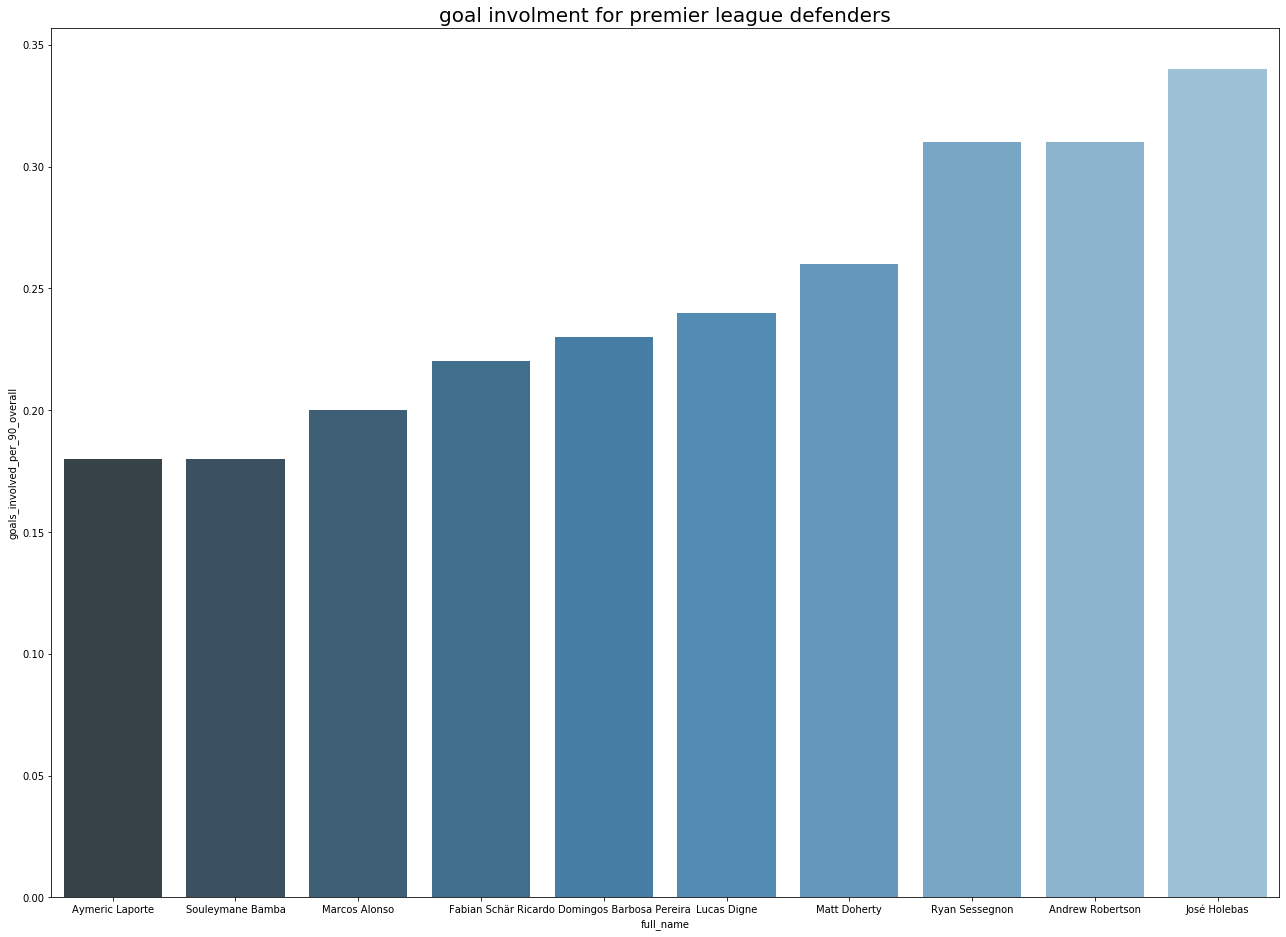

In [3]:
chelsea_data = exp_data[(exp_data['position'] == 'Defender') & 
                        (exp_data['league'] == 'Premier League') 
                         & (exp_data['minutes_played_overall'] > 2000)]
scout_chelsea = chelsea_data.sort_values('goals_involved_per_90_overall').tail(10)
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="goals_involved_per_90_overall", palette="Blues_d", data=scout_chelsea, ax=ax)
plt.title('goal involment for premier league defenders', fontsize = 20);

Insights - Jose Holebas has the best goal involvment ratio per 90 minutes, the Watford defender is 35 years with a market value of £2.5M and £39,000 in weekly wages, even thou Andy Robertson is quite young at 25 years, his weekly wage is £135,000.
We suggest Ryan Sessegnon, who is third best on the list- very young at 19 years of age and commands a lower weekly wage of £38,000

#### Manchester has approached the data science team, they are looking for a player (forward/midfielder) in the top leagues that consistently converted penalties in the 2018/2019 season?

Why is this a problem for Manchester United? Manchester United were awarded the most penalties in the 2018/2019 season (12 in total..most in the league), they scored 9 and had 3 penalties saved. The manager has deemed this "not good enough" -solution is to find a player in the top leagues that amassed more than 2500 minutes of football and has a goal involvement ratio greater than 0.5. They have stated money is not an issue as they only want the best.

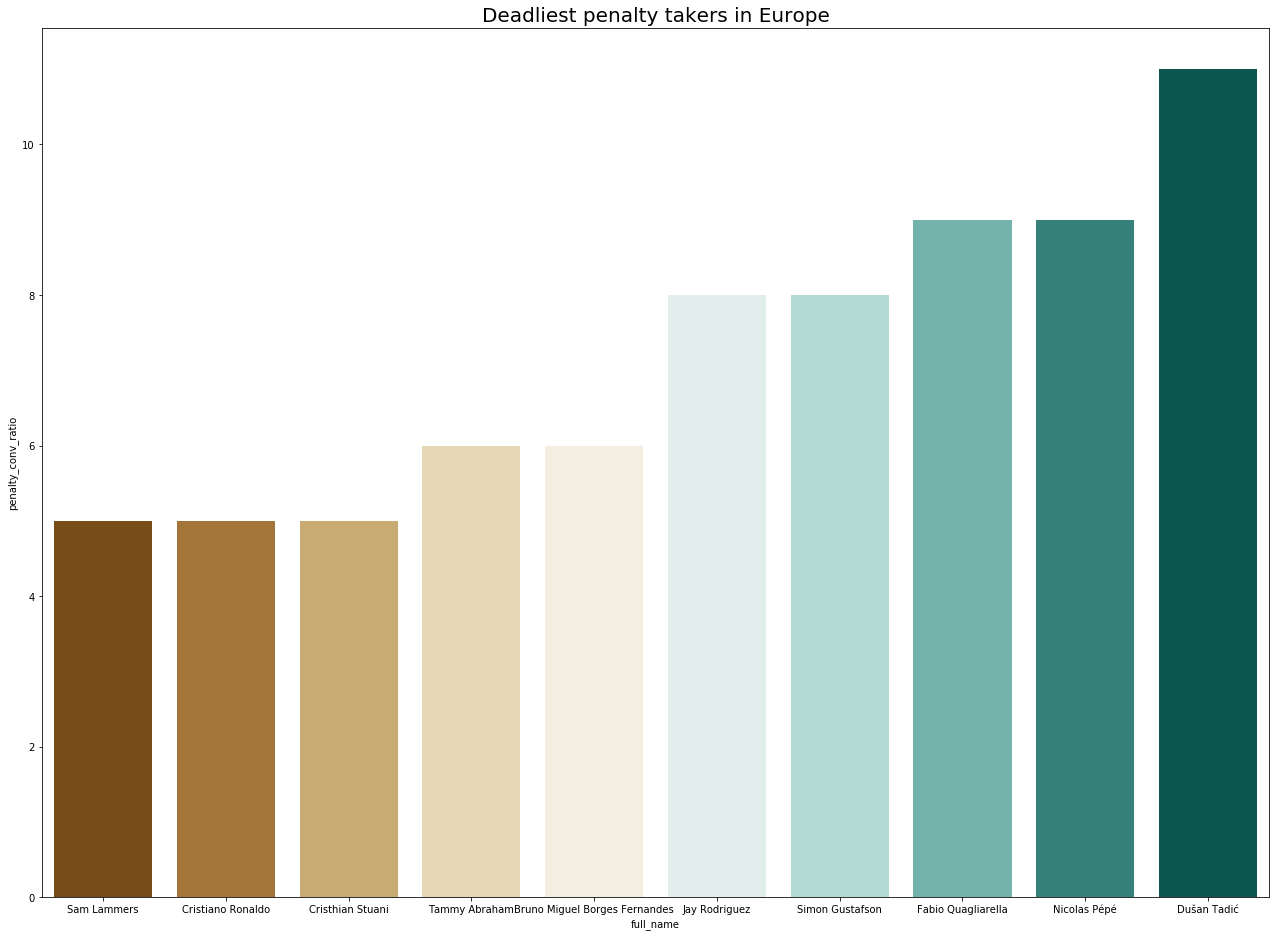

In [4]:
manc = exp_data[(exp_data['position'] == 'Forward') & (exp_data['minutes_played_overall'] > 2500)
                & (exp_data['goals_involved_per_90_overall'] > 0.5) | 
                            (exp_data['position'] == 'Midfielder') & 
                           (exp_data['goals_involved_per_90_overall'] > 0.5) 
                            & (exp_data['minutes_played_overall'] > 2500)]
#calculating penalty conversion ratio
manc['penalty_conv_ratio'] = manc['penalty_goals']/manc['penalty_misses']
manc['penalty_conv_ratio'] = manc['penalty_conv_ratio'].replace(np.inf, np.nan)
manc.loc[manc['penalty_conv_ratio'].isnull(),'penalty_conv_ratio'] = manc['penalty_goals']
scout_manc = manc.sort_values('penalty_conv_ratio').tail(10)
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="penalty_conv_ratio", palette="BrBG", data=scout_manc, ax=ax)
plt.title('Deadliest penalty takers in Europe', fontsize = 20);

Insights - I would recommend Bruno Fernandes of Sporting CP to Manchester United as he has the sixth best penalty conversion rate, he is 25 years of age and has a higher goal involvement ratio than Simon Gustafson of Utrecht in fourth and he is also cheaper in terms of weekly wages and 6 years younger than Dusan Tudic in first place.
Although Nicolas Pepe is younger, he commands a higher weekly wage at £97,000 and lower goal_involvment ratio at 0.89.

#### Atletico Madrid club in the spanish league has approached the data science team- with their tight transfer budget, they asked us to find and suggest a forward in premier league that has the highest ratio of goals/market value

This is a classic case of return on investment, and it is a very valid proposal- essentially saying----get us the striker that is worth his weight in gold.

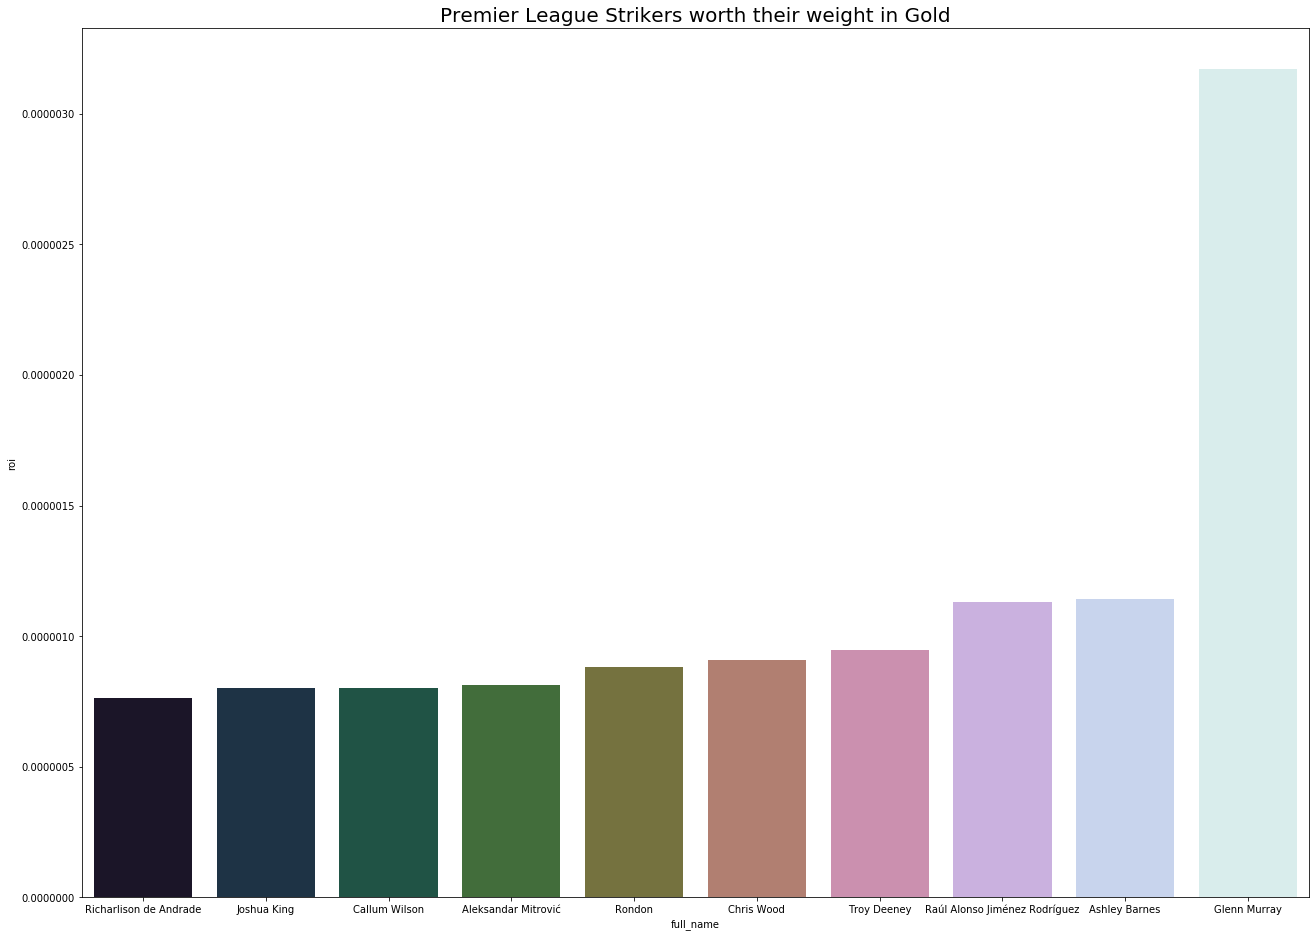

In [5]:
striker_data = exp_data[(exp_data['position'] == 'Forward') & (exp_data['minutes_played_overall'] > 2000)& (exp_data['league'] == 'Premier League')]
striker_data['roi'] = striker_data['goals_overall'] / (striker_data['market_value'])                             
scout_atletico = striker_data.sort_values('roi').tail(10)
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="roi", palette="cubehelix", data=scout_atletico, ax=ax)
plt.title('Premier League Strikers worth their weight in Gold', fontsize = 20);

Insights - Brighton striker Glenn Murray, last season's performances in terms of goals compared to his market value is the best in the whole of the premier league but at 36, he might not represent a good return on investment in the long term in terms of resale value.
We as Data Scientist suggest Callum Wilson, although he is 5 years older than Richarlison who is the youngest in the group. He has more more goals and assists than any player in the top 10, difference of 0.20 goal involvment ratio than second on the list Solomon Random. He also comes in tied second youngest on the list, which means more years to play at the top level before retirement.

####  Brighton and Southampton were 2 and 3 points from being relegated to the championship last season. They have tasked us with looking for a striker and a defender in the championship that can boost their performance in the upcoming season

It is necessary these two team get some good reinforcements that can prevent the struggles of last season. The first point of call is getting a striker to put the ball in the back of the net and defender to stop leaking of goals. These small teams don't have the transfer budgets of big clubs hence they have specifically asked for championship top performers.

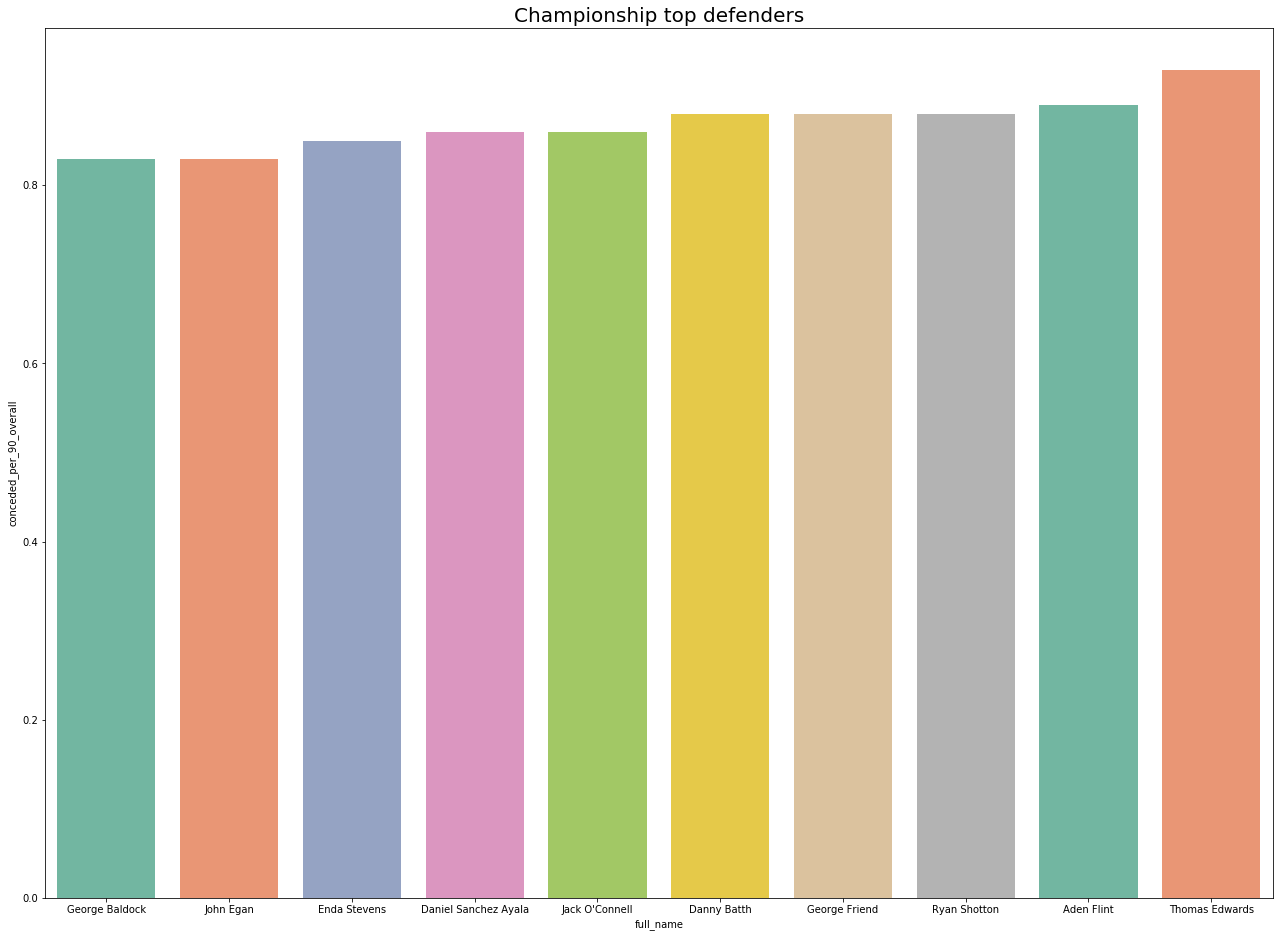

In [6]:
champ_def = exp_data[(exp_data['league'] == 'Championship') & (exp_data['position'] == 'Defender')
                     & (exp_data['minutes_played_overall'] > 1500) 
                     & (exp_data['clean_sheets_overall'] > 10)]
scout_champ_def = champ_def.sort_values('conceded_per_90_overall').head(10)
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="conceded_per_90_overall", palette="Set2", data=scout_champ_def, ax=ax)
plt.title('Championship top defenders', fontsize = 20);

Insights  - George Baldock, John Egan and Enda Stevens are all Sheffield United defenders and they had the least amount of goals conceded for every 90 minutes they were on the pitch. We suggest a bid for George Baldock would be the best option, he is 26 and cheapest out of the first four options in terms of weekly wages at £25,000 and he is worth a market_value of £4.2M

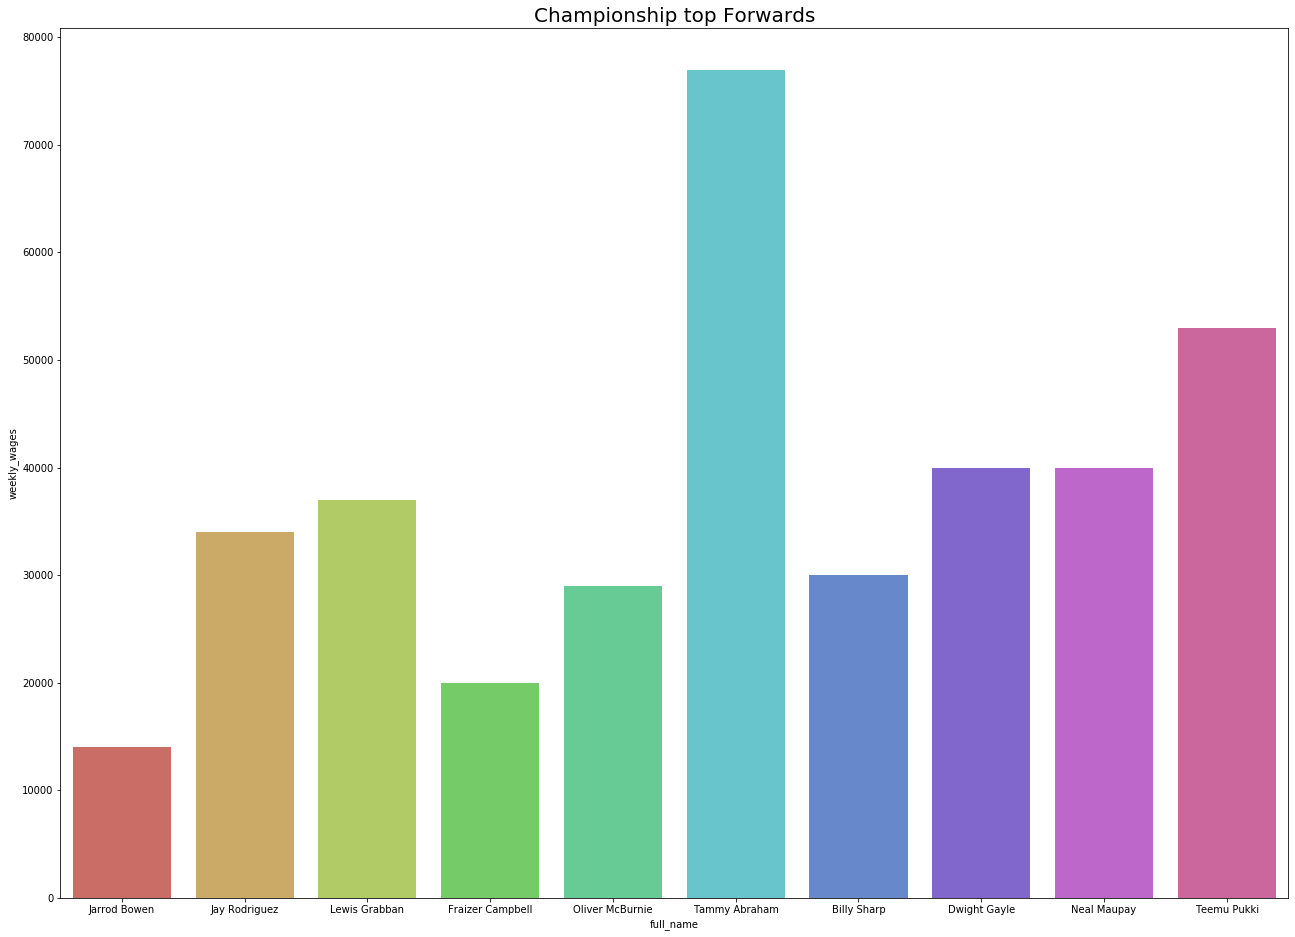

In [7]:
champ_fwd = exp_data[(exp_data['league'] == 'Championship') & (exp_data['position'] == 'Forward')
                     & (exp_data['minutes_played_overall'] > 1500) 
                     & (exp_data['goals_overall'] > 10)] 
scout_champ_fwd = champ_fwd.sort_values('goals_involved_per_90_overall').tail(10)
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="weekly_wages", palette="hls", data=scout_champ_fwd, ax=ax)
plt.title('Championship top Forwards', fontsize = 20);

Insights  - Norwich striker Teemu Pukki is the highest performing forward in the championship ahead of Neal Maupay and big name forward "Tammy Abraham", We suggest Neal Maupay as an ideal buy, one year older than Tammy Abraham, six years and ten years younger than Dwight Gayle and Billy Sharp respectively with a weekly wage demand of £40,000 which is £37,000 cheaper than Tammy Abraham.

####  AS ROMA, an Italian football club approached the data science team and would very much like to plan for the future in their goalkeeping department, having shipped in 48 goals last season in the SERIE A. They plan on delving into the european transfer market to get the best goalkeeper under the age of 25.

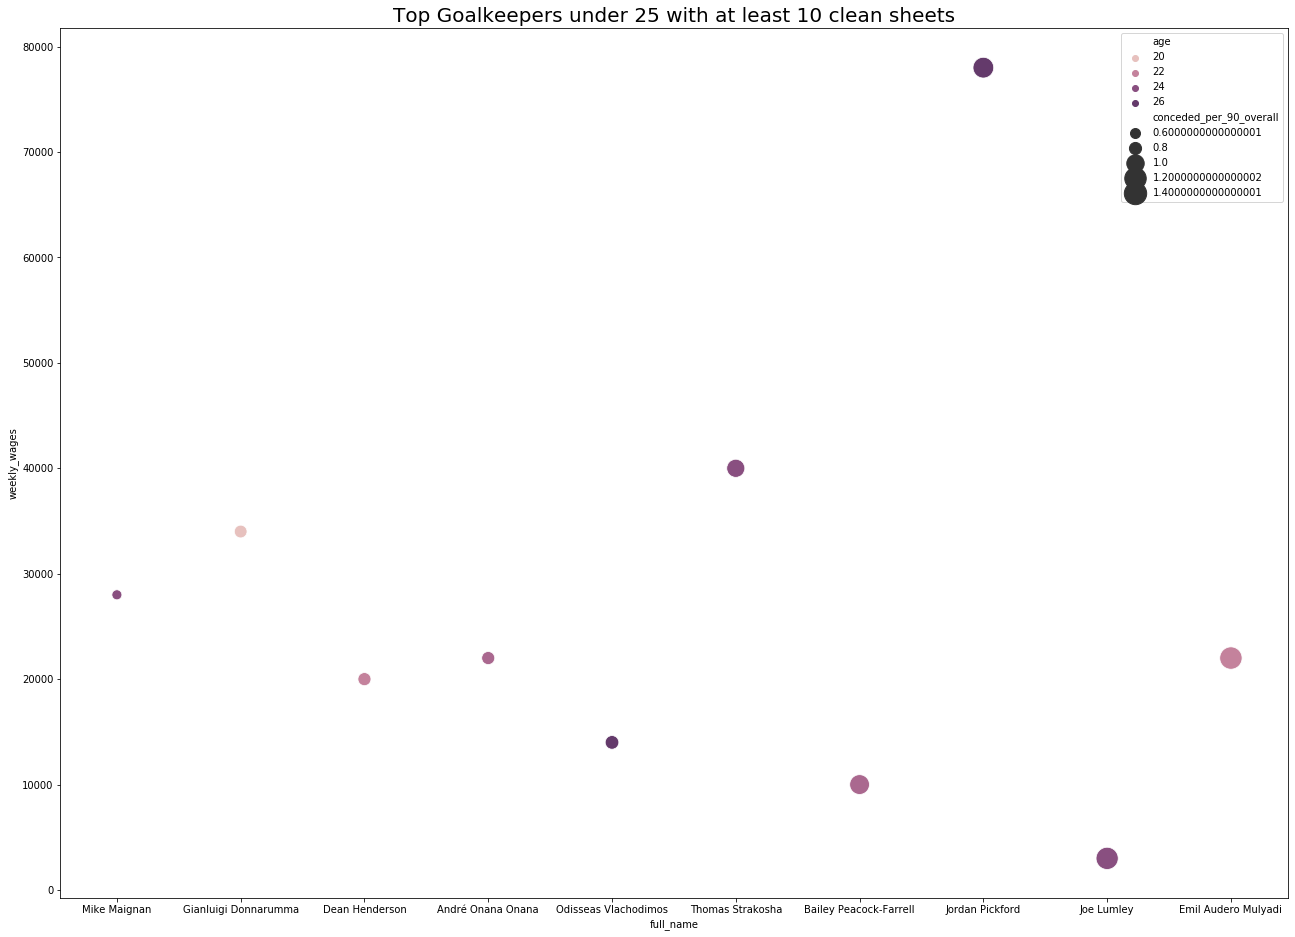

In [8]:
roma_gk = exp_data[(exp_data['position'] == 'Goalkeeper') & (exp_data['age'] <= 25)
                  & (exp_data['clean_sheets_overall'] >= 10)]
scout_roma_gk = roma_gk.sort_values('conceded_per_90_overall').head(10)
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="full_name", y="weekly_wages",
                     hue="age", size="conceded_per_90_overall",
                     palette=cmap, sizes=(100, 500),
                     data=scout_roma_gk)
plt.title('Top Goalkeepers under 25 with at least 10 clean sheets', fontsize = 20);

Insights - I would recommed FC Lille goalkeeper Mike Maignan to AS Roma, He is exactly the kind of goalkeeper they are looking for, with his wages at £28,000 and age at 24. He has the lowest goals conceded for every 90 minutes.

## OLS REGRESSION MODELLING


In [9]:
ols_data = pd.read_csv("final_players.csv")

In [10]:
ols_test(ols_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weekly_wages   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     299.0
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          2.50e-307
Time:                        10:06:57   Log-Likelihood:                -39389.
No. Observations:                3351   AIC:                         7.879e+04
Df Residuals:                    3344   BIC:                         7.883e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.633e+05    1.2e+04    -21.986      0.000   -2.87e+05    -2.4e+05
age                     2.312e+04   3296.315      7.013      0.000    1.67e+04    2.96e+04
assists_overall         7242.8814    938.854      7.715      0.000    5402.095    9083.668
penalty_goals           9614.3845   2029.023      4.738      0.000    5636.132    1.36e+04
penalty_misses         -5890.0324   4049.677     -1.454      0.146   -1.38e+04    2050.063
minutes_played_overall -2543.1891    272.603     -9.329      0.000   -3077.676   -2008.703
market_value            1.528e+04    445.140     34.322      0.000    1.44e+04    1.62e+04
==============================================================================
Omnibus:                     2996.038   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155353.732
Skew:                           4.072   Prob(JB):                         0.00
Kurtosis:                      35.347   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No signs of multicollinearity although the adjusted R-squared is a very low value, we get a better more robust model which enables each feature in the model to be truly independent and each variable can be varied with others kept constant.
There is still a lot of skew and kurtosis in the distribution of the model results but this might be atrributed to the magnitude of each value not being on the same scale.More pre-processing is definitely needed.
The positive skewness indicates a long tail to the right and postive kurtosis value more than 3 points to having too great a peak

Next we delve into recursive feature elimination to see if the predictors are actually relevant and contributing to the prediction power of the model and we have stated above that there is no sign of multicollinearity

In [11]:
target = ols_data['weekly_wages'].values
predictors = ols_data[['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value']]

In [12]:
rank(ols_data, predictors, target)

estiamtor coefficients
[23118.07339347  7242.88137288  9614.38453774 -5890.03236813
 -2543.18907604 15277.91706648]


estimator intercepts are
-263342.90818025987


Are features relevant?


[ True  True  True  True  True  True]


What the above feature ranking reveals is that all the features selected from the dataset have a ranking of one and all contribute the training of the model

## ASSUMPTIONS CHECK

The next step is to check whether the data meets the criteria to run a linear regression model.

In [13]:
assump_data = pd.read_csv('final_players.csv')

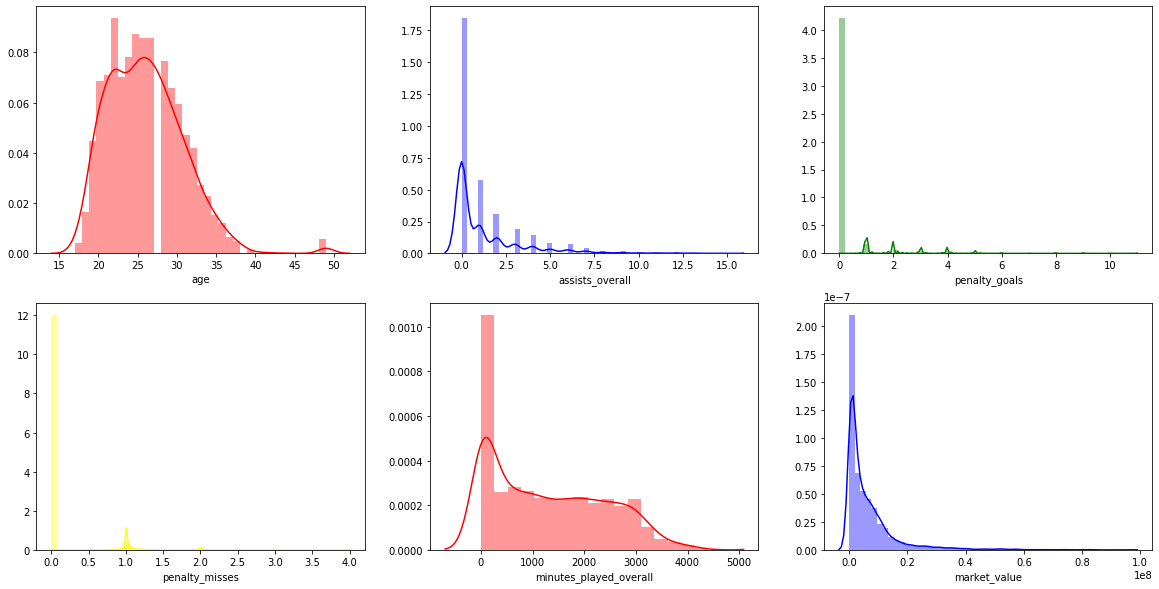

In [14]:
#using domain kmnowledge to select features and making sure the features we selected 
# are not linearly correlated wit each other
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

sns.distplot(assump_data['age'], color = 'red', ax = ax1)
sns.distplot(assump_data['assists_overall'], color = 'blue', ax = ax2)
sns.distplot(assump_data['penalty_goals'], color = 'green', ax = ax3)
sns.distplot(assump_data['penalty_misses'], color = 'yellow', ax = ax4)
sns.distplot(assump_data['minutes_played_overall'], color = 'red', ax = ax5)
sns.distplot(assump_data['market_value'], color = 'blue', ax = ax6)

Judging from the plot above, none of the variables selected satisfy the assumption of Normality, a linear regression features must satisfy-Linearity, -Normality and Homoscedasticity

It is clear to see most of the distributions display a high level of skewness and kurtosis especially market value indicating a lot of outliers in the data. The age data is the only distribution displaying similarities of a bell-shaped curve but it's still positively skewed

The next step is to check for all the assumptions in all our selected features, Regression plot Linearity, Residual plot for Homoscedasticity and Q-Q plot for Normality

Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~age
-------------------------------------------------------------------------------------


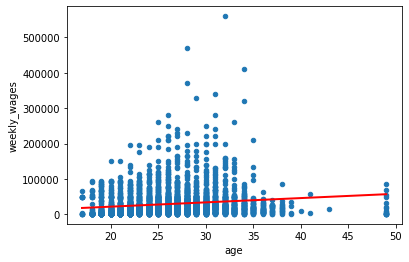

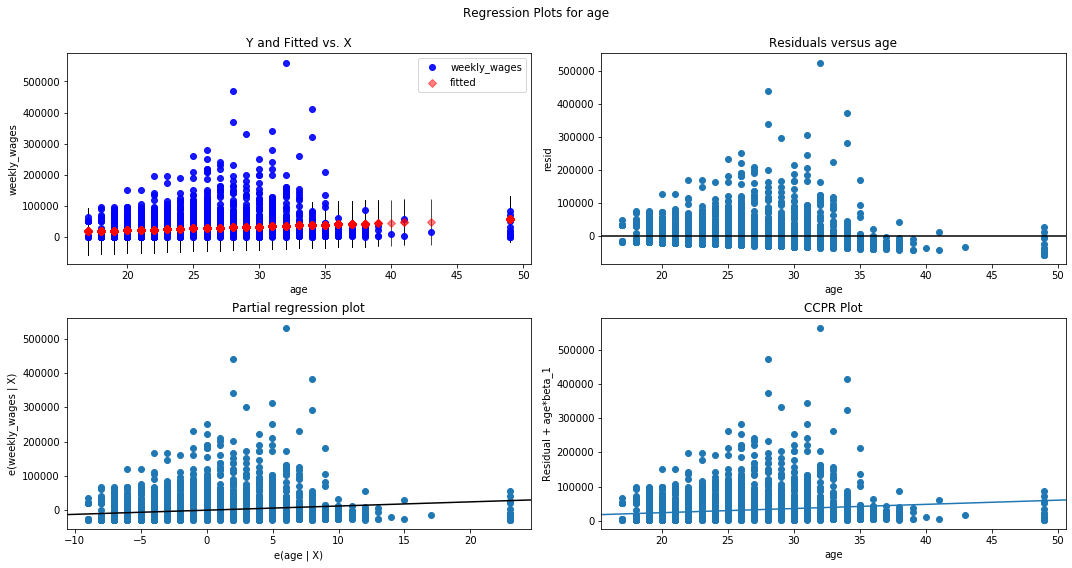

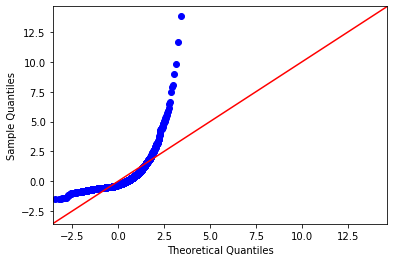

Press Enter to continue...enter
Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~assists_overall
-------------------------------------------------------------------------------------


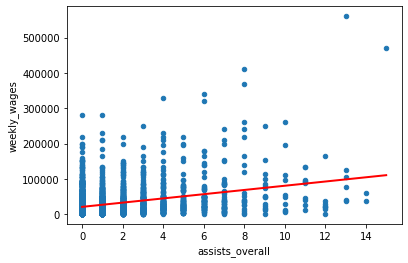

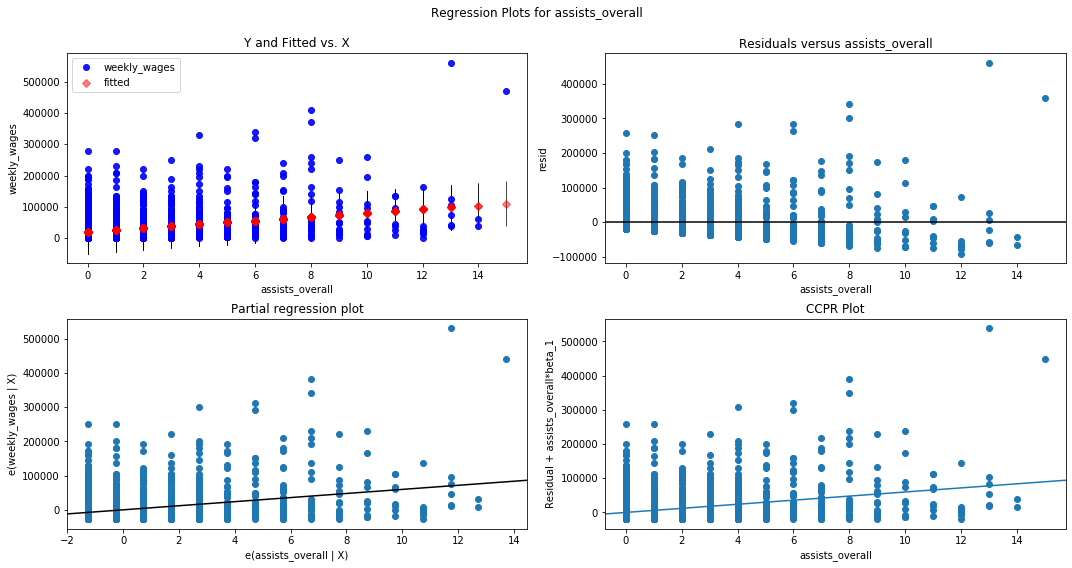

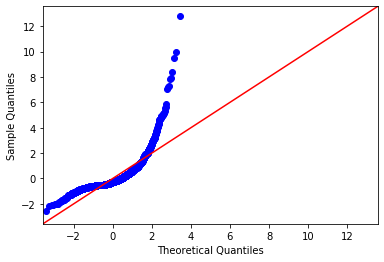

Press Enter to continue...enter
Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~penalty_goals
-------------------------------------------------------------------------------------


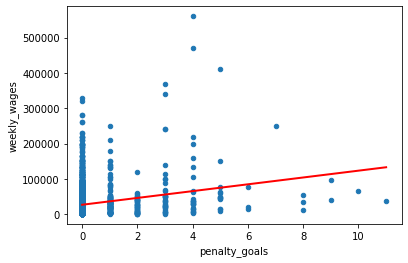

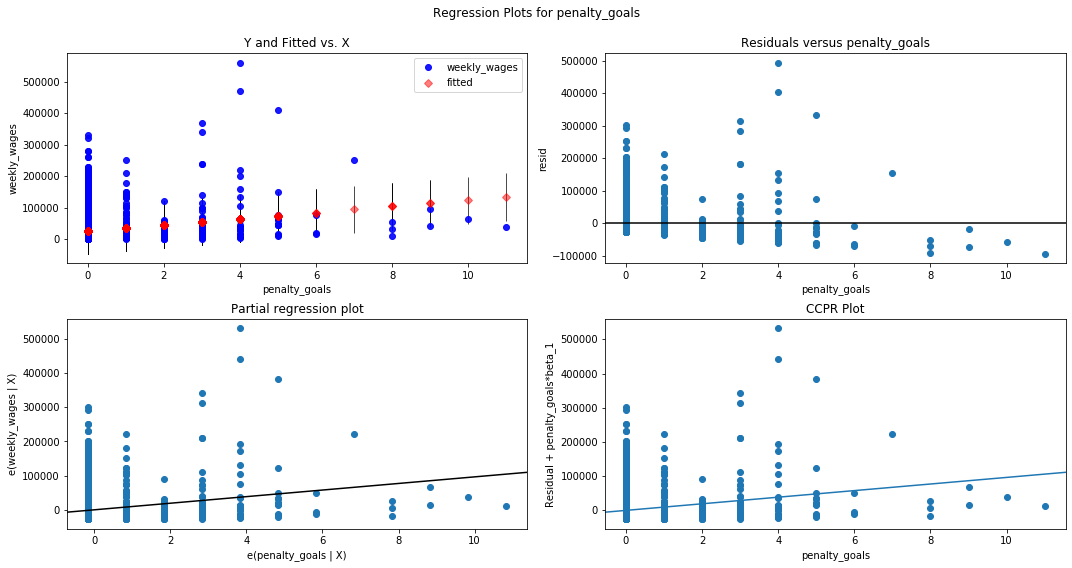

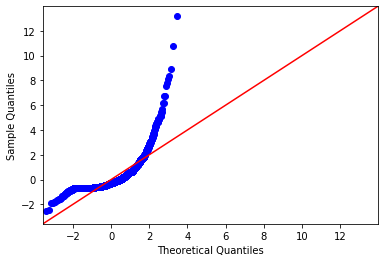

Press Enter to continue...enter
Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~penalty_misses
-------------------------------------------------------------------------------------


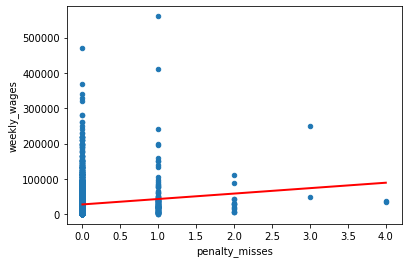

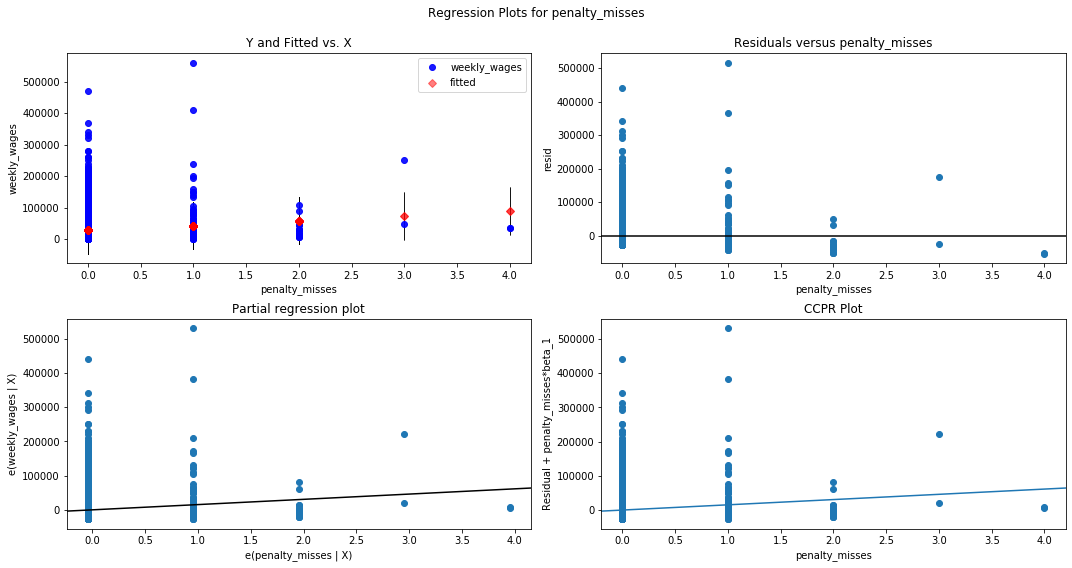

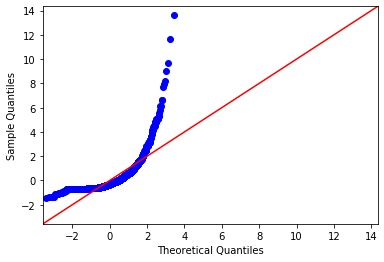

Press Enter to continue...enter
Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~minutes_played_overall
-------------------------------------------------------------------------------------


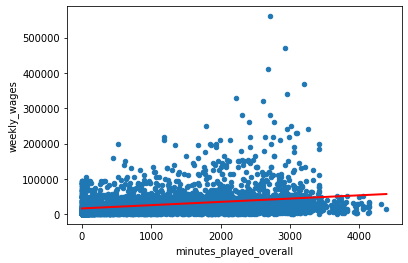

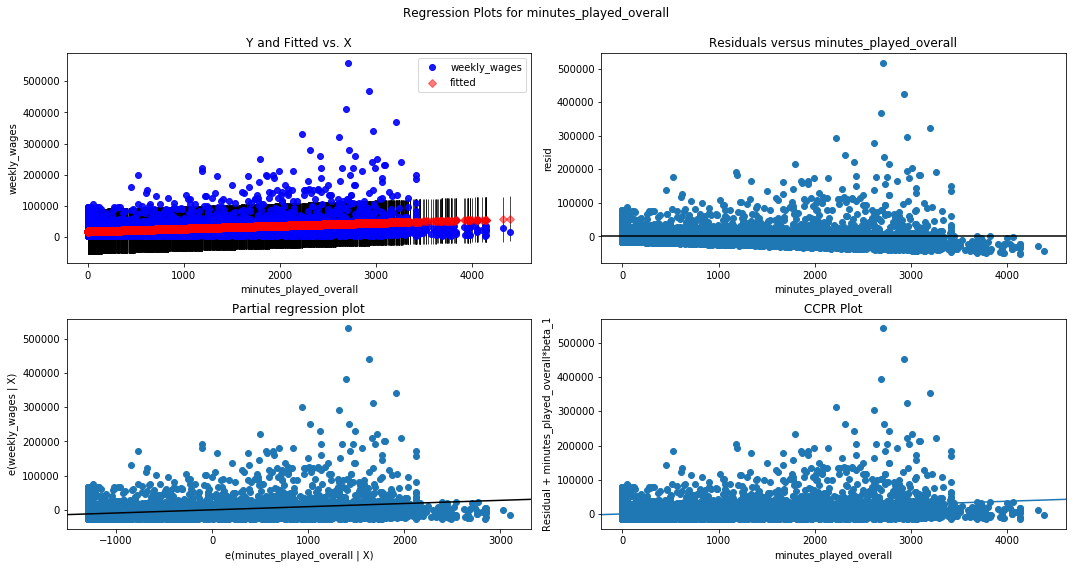

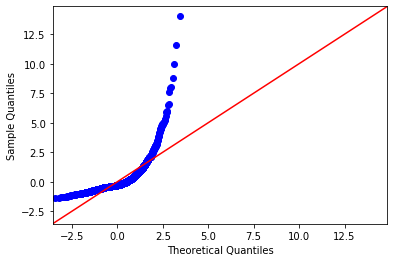

Press Enter to continue...enter
Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~market_value
-------------------------------------------------------------------------------------


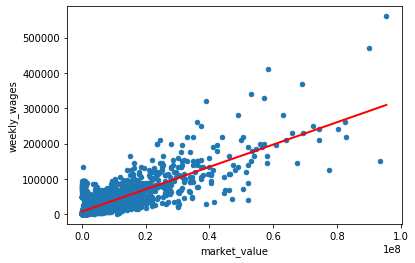

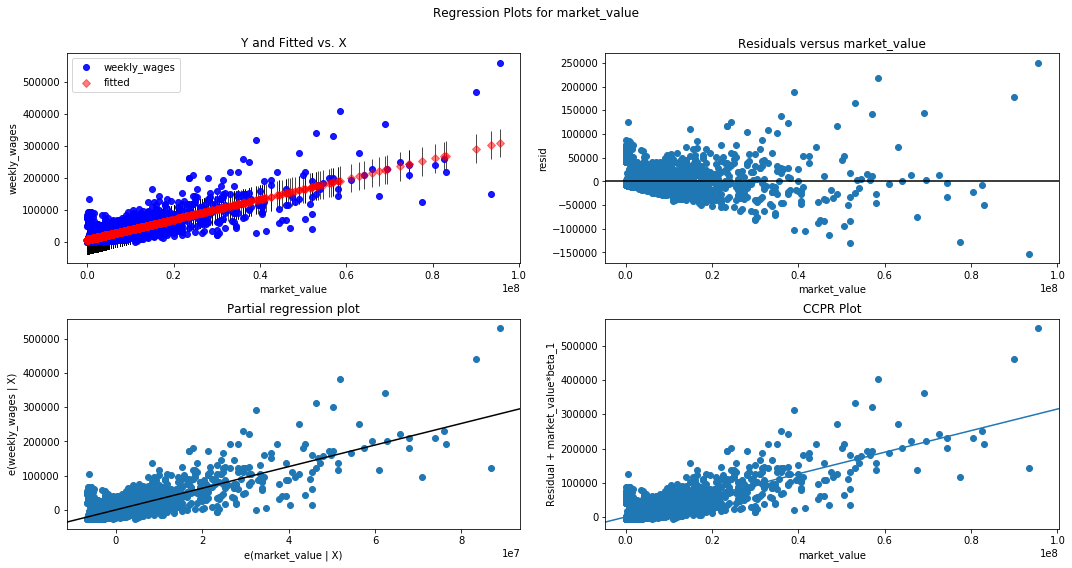

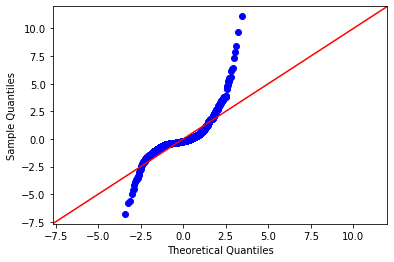

Press Enter to continue...enter


In [15]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value']):
    print ("Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'weekly_wages~' + val
#   
    model = smf.ols(formula=f, data=assump_data).fit()
    
    X_new = pd.DataFrame({val: [assump_data[val].min(), assump_data[val].max()]});
    preds = model.predict(X_new)
    assump_data.plot(kind='scatter', x=val, y='weekly_wages');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

Judging from the plots above, from all of the predictor variables, only market value has a positive linear relationship with target variable weekly wages which informs that the model migh tbenefit from some feature interaction and feature engineering such as polynomial regression. The other plots neither satisy Homoscedasticity which points to equal variance amongst the residuals of the target variable and predictor variable. Neither do they satisfy normality judging from the Q-Q plots and the distributions of the plot. This informs that pre-processing of the data is paramount

In [16]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,age,0.0232716,-2785.86,1214.21,6.71506e-19,137928
2,assists_overall,0.109551,21215.3,5973.8,1.73347e-86,83907.4
3,penalty_goals,0.0372733,27179.5,9640.67,1.68381e-29,99261.9
4,penalty_misses,0.00990202,28115.8,15343.7,7.80872e-09,129697
5,minutes_played_overall,0.0718287,16813.1,9.26032,3.18379e-56,139863
6,market_value,0.650705,7884.3,0.00315717,0,41807.3


The dataframe above shows that the six features contributes to the prediction of the target variable, and the market_value feature is the dominant predictor with a slope of 0.0031, for every one unit change in the market value, multiply the coefficeint by the predictor variable

## LINEAR REGRESSION

### BASELINE MODEL

In [17]:
reg_data = pd.read_csv('final_players.csv')

In [18]:
# added full name so we can identify the prediction results after the train test split
#This baseline model is based on just continuous variables
target = reg_data['weekly_wages']
predictors = reg_data[['full_name','age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value', 'clean_sheets_overall']]

In [19]:
#train test split on the entire dataset for validation of the model purposes
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state = 42, test_size = 0.30)

In [20]:
full_name_train = X_train['full_name']
X_train.drop('full_name', axis=1, inplace=True)
full_name_test = X_test['full_name']
X_test.drop('full_name', axis =1, inplace = True)

In [21]:
cat_predictors = reg_data[['league', 'position']]
X_train_cat, X_test_cat, y_train, y_test = train_test_split(cat_predictors, target, test_size = 0.30, random_state = 42)

In [22]:
modelling(reg_data, X_train, X_test, y_train, y_test, X_train_cat, X_test_cat)

Baseline model for Continuous variables
Training r^2: 0.67336666045365
Testing r^2: 0.6441085449289107
Training MSE: 479954644.88109446
Testing MSE: 508515576.75408506


Baseline model for Continuous variables
Training r^2: 0.3510315129418742
Testing r^2: 0.36215117177233347
Training MSE: 953593531.442938
Testing MSE: 911390425.778329


----This is the combination of both continuous and baseline------


Baseline model Continuous and Categorical
Training r^2: 0.6885733234410595
Testing r^2: 0.6724766647520386
Training MSE: 457609992.176367
Testing MSE: 467981783.07138664


 Polynomial training set for continuous and categorical
MSE of training set is 17300.084685664737
R2 score of training set is 0.7963160679576795


Polynomial test set for continuous and categorical 
MSE of test set is 19779.01250959649
R2 score of test set is 0.7262068928872164


Cross Validation Mean r2: -1.3961612169908437e+19
Cross Validation Mean MSE: -3.717660535344389e+28
Cross Validation 10 Fold Score: [ 5.3612

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


0.7009692865838489
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.25}


----Running the train and test predictions on the XGB Regressor model----
Training score: 0.83
mean_squared_error for train: 2.5e+08
test score: 0.76
mean_squared_error for test: 3.5e+08


The above baseline model is performing averagely but take into account we haven't added the categorical variables and the difference in MSE between training and the test is not a lot so the model points more towards underfitting than overfitting.

With the log transformations of the features, the model gets worse as the proportion of varaince explained by the model decreases when compared to the first model, and the mean squared error also increases

The next step is to add the categorical variables, the league and the position of each player into the model features

As you can see from above, the model fit improved with r-squared at 0.67 for the test data and 0.68 for the training data. The MSE also decreases when compared to the first two models, and the model is genreralizable and more robust, as the differnce in the MSE bewteen the train and test data is low

### POLYNOMIAL REGRESSION

Accounting for interactions in a model is quite important, what you are essentially doing is transforming a variable role in a linear regression based on another one, using PolyNomial features allows both interactions and polynomial expansions. The Polynomial regression results for the train and test data is a big improvement on the baseline model with a lower MSE, higher r squared for the better model fit and most importantly generalizable to test data

### EXTREME GRADIENT BOOSTING

The xgb regressor is the best performing model with a r-squared value of 0.76 for the test and MSE value of 1.0e08. This ensemble method works by sequentially adding predictors to an ensemble and each one correcting its predecessor. It works to improve the weak learners in the group of learners, it tries to fit a new predictor to the residual errors made by the previous predictor.

## TEST MODEL ON NEW DATA SET 

In [23]:
new_data = pd.read_csv("soccer.csv")

In [24]:
new_data['rank_in_league_top_attackers'] = new_data['rank_in_league_top_attackers'].replace(-1,0)
new_data['rank_in_league_top_midfielders'] = new_data['rank_in_league_top_midfielders'].replace(-1,0)
new_data['rank_in_league_top_defenders'] = new_data['rank_in_league_top_defenders'].replace(-1,0)

In [25]:
target = new_data["weekly_wages"]
predictors = new_data[['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value', 'clean_sheets_overall']]

cat_predictors = new_data[['league', 'position']]

In [26]:
ss = StandardScaler()
predict_scale  = ss.fit_transform(predictors)

In [27]:
ohe = OneHotEncoder(handle_unknown='ignore')
cat_hot = ohe.fit_transform(cat_predictors)

In [28]:
columns = ohe.get_feature_names(input_features=cat_predictors.columns)
cat_df = pd.DataFrame(cat_hot.todense(), columns=columns)
all_data = pd.concat([pd.DataFrame(predict_scale), cat_df], axis = 1)


In [29]:
all_data.head()

,0,1,2,3,4,5,6,league_Bundesliga,league_Championship,league_Eredivisie,league_La Liga,league_Liga NOS,league_Ligue 1,league_Premier League,league_Serie A,position_Defender,position_Forward,position_Goalkeeper,position_Midfielder
0,-0.568588,4.265343,5.015674,-0.280828,1.234316,2.142336,0.648124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.805592,1.892110,-0.441464,-0.280828,-0.128760,0.816489,1.121752,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.310791,0.309954,3.196628,4.521330,0.145435,-0.351519,-0.535948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.163218,-0.085584,-0.441464,-0.280828,1.089884,-0.648257,-0.535948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.805592,-0.481123,-0.441464,-0.280828,0.511028,-0.256816,-0.299134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
loaded_model = joblib.load("finalized_model.sav")
predict_wages  = loaded_model.predict(all_data)


In [31]:
all_data.head()

,0,1,2,3,4,5,6,league_Bundesliga,league_Championship,league_Eredivisie,league_La Liga,league_Liga NOS,league_Ligue 1,league_Premier League,league_Serie A,position_Defender,position_Forward,position_Goalkeeper,position_Midfielder
0,-0.568588,4.265343,5.015674,-0.280828,1.234316,2.142336,0.648124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.805592,1.892110,-0.441464,-0.280828,-0.128760,0.816489,1.121752,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.310791,0.309954,3.196628,4.521330,0.145435,-0.351519,-0.535948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.163218,-0.085584,-0.441464,-0.280828,1.089884,-0.648257,-0.535948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.805592,-0.481123,-0.441464,-0.280828,0.511028,-0.256816,-0.299134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
new_data['predicted_wages'] = pd.Series(predict_wages)

In [33]:
new_data.head(50)

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages_1,market_value_1,weekly_wages,market_value,predicted_wages
0,Bruno Miguel Borges Fernandes,25,Liga NOS,2018/2019,Midfielder,Sporting CP,2943,1440,1503,Portugal,...,0.28,12,4,0,1,"€24,000","£49,000,000",24000,49000000,59388.636719
1,João Félix Sequeira,20,Liga NOS,2018/2019,Forward,Benfica,1735,942,793,Portugal,...,0.10,6,9,0,3,"£38,000","£28,000,000",38000,28000000,29655.656250
2,Dodi Lukebakio,22,Bundesliga,2018/2019,Midfielder,Fortuna Düsseldorf,1978,892,1086,Belgium,...,0.27,32,101,0,2,"£21,000","£9,500,000",21000,9500000,10651.457031
3,Theodor Gebre Selassie,32,Bundesliga,2018/2019,Defender,Werder Bremen,2815,1350,1465,Czech Republic,...,0.06,167,185,59,8,"£24,000","£4,800,000",24000,4800000,8002.365723
4,Obite Evan N'Dicka,20,Bundesliga,2018/2019,Defender,Eintracht Frankfurt,2302,1223,1079,France,...,0.12,227,211,46,9,"£15,000","£11,000,000",15000,11000000,13841.469727
5,Allan Rodrigues de Souza,22,Bundesliga,2018/2019,Midfielder,Eintracht Frankfurt,175,107,68,Brazil,...,0.51,0,0,0,11,"£28,000","£1,600,000",28000,1600000,22433.988281
6,Alassane Pléa,26,Bundesliga,2018/2019,Forward,Borussia M'gladbach,2508,1248,1260,France,...,0.07,38,106,0,1,"£41,000","£22,000,000",41000,22000000,28380.441406
7,Gian-Luca Waldschmidt,23,Bundesliga,2018/2019,Forward,Freiburg,1714,997,717,Germany,...,0.05,31,199,0,2,"£23,000","£10,500,000",23000,10500000,14175.611328
8,Gonçalo Mendes Paciencia,25,Bundesliga,2018/2019,Forward,Eintracht Frankfurt,387,159,228,Portugal,...,0.23,4,48,0,7,"£31,000","£10,500,000",31000,10500000,16667.126953
9,Josip Drmic,27,Bundesliga,2018/2019,Forward,Borussia M'gladbach,219,106,113,Switzerland,...,0.00,0,0,0,10,"£46,000","£8,000,000",46000,8000000,12109.080078


The results clearly shows that the model can generalise on new test data, for example Bruno Fernandes, best player for sporting lisbon earned £24,000 in the portugese league whereas his true worth in my model prediction is roughly £60,000. This is based on his incredible performances in the previous season, he recently signed a new contract for his club (sporting Lisbon) for £65,000. My model is not too far away from his true wages